3. Vizualizatsiya:
Kamida 3 ta grafik tuzing:
• tenure (kompaniyada qolish muddati) bo‘yicha Churn taqsimoti
• MonthlyCharges va Churn o‘rtasidagi bog‘liqlik (boxplot)
• Contract turiga ko‘ra Churn taqsimoti (countplot)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ma'lumotlarni yuklab olish
df = pd.read_csv("C:/Users/user/Desktop/modullar/Mustaqil/data.csv")

# Vizualizatsiya stilini o‘rnatish
sns.set(style="whitegrid")


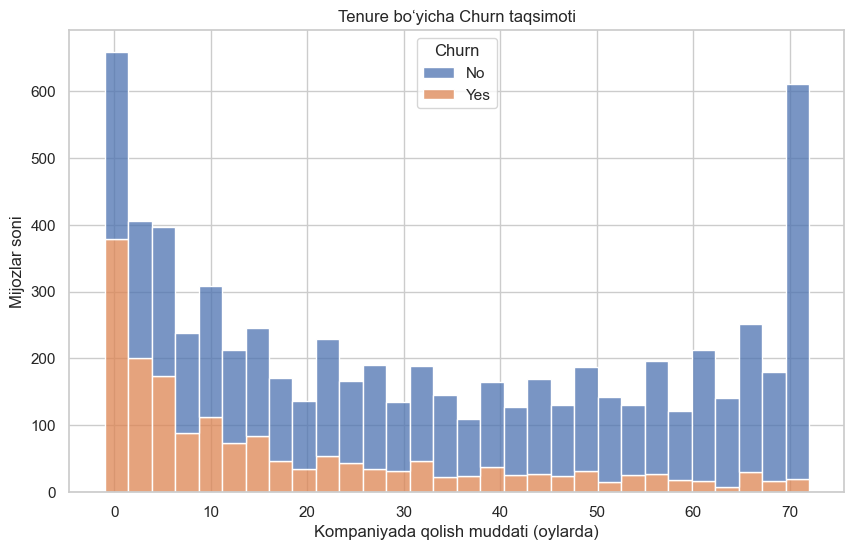

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure bo‘yicha Churn taqsimoti')
plt.xlabel('Kompaniyada qolish muddati (oylarda)')
plt.ylabel('Mijozlar soni')
plt.show()

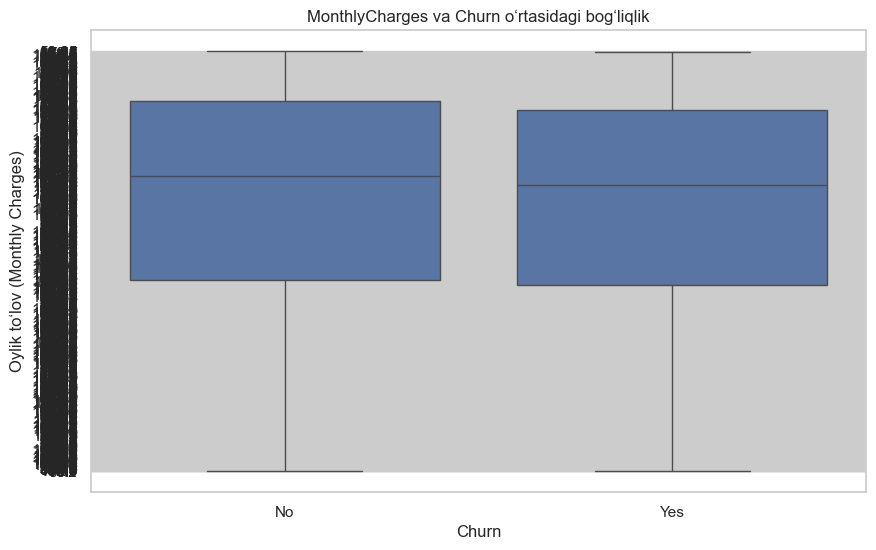

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('MonthlyCharges va Churn o‘rtasidagi bog‘liqlik')
plt.xlabel('Churn')
plt.ylabel('Oylik to‘lov (Monthly Charges)')
plt.show()


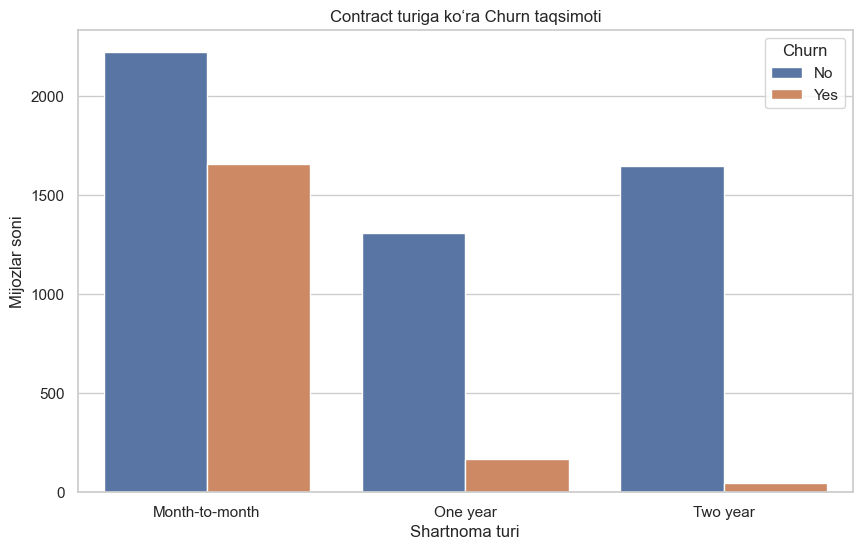

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract turiga ko‘ra Churn taqsimoti')
plt.xlabel('Shartnoma turi')
plt.ylabel('Mijozlar soni')
plt.show()

4. Ma’lumotlarni tozalash:
• Yetishmayotgan qiymatlar (NaN)
• Noto‘g‘ri qiymatlar (??, unknown)
• Noodatiy yoki salbiy qiymatlar (TotalCharges > 10000, tenure < 0)
• To‘g‘ri ma’lumot turlari bilan ishlash

In [5]:
# NaN qiymatlarni tekshirish
print(df.isnull().sum())

# NaN qiymatlarni to‘ldirish yoki o‘chirish (misol uchun, o‘chirish)
df = df.dropna()  # yoki kerakli ustunlar uchun to‘ldirish ham mumkin
# df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure              347
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      347
TotalCharges        345
Churn                 0
dtype: int64


In [6]:
# ?? va 'unknown' kabi qiymatlar mavjudligini tekshirish
for col in df.columns:
    print(f"{col} ustunidagi noyob qiymatlar:", df[col].unique())

# '??' yoki 'unknown' qiymatlarni NaN ga aylantirib, keyin tozalash
df.replace(['??', 'unknown', ' '], pd.NA, inplace=True)
df = df.dropna()


customerID ustunidagi noyob qiymatlar: ['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '6840-RESVB' '4801-JZAZL'
 '3186-AJIEK']
gender ustunidagi noyob qiymatlar: ['Male' 'Female']
SeniorCitizen ustunidagi noyob qiymatlar: [0 1]
Partner ustunidagi noyob qiymatlar: ['No' 'Yes']
Dependents ustunidagi noyob qiymatlar: ['No' 'Yes']
tenure ustunidagi noyob qiymatlar: [34.  2.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 21.  1. 12. 30.
 47. 72. 17. 71. -1. 27.  5. 46. 11. 63. 15. 60. 18. 66.  3. 64. 56. 45.
  7. 42.  9. 35. 48. 29. 65. 38. 68. 32. 43. 55. 36. 41. 33. 67. 57. 61.
 70. 14. 20.  4. 53.  6. 59. 24. 44. 19. 23. 31. 54. 50. 51. 40. 37. 26.
  0. 39.]
PhoneService ustunidagi noyob qiymatlar: ['Yes' 'No']
MultipleLines ustunidagi noyob qiymatlar: ['No' 'Yes' 'No phone service']
InternetService ustunidagi noyob qiymatlar: ['DSL' 'Fiber optic' 'No']
OnlineSecurity ustunidagi noyob qiymatlar: ['Yes' 'No' 'No internet service']
OnlineBackup ustunidagi noyob qiymatlar: ['No' 'Yes' 'No int

In [7]:
# TotalCharges ustuni raqam bo‘lmasligi mumkin, to‘g‘ri formatga o‘tkazamiz
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Salbiy yoki noodatiy qiymatlar bilan qatorlarni olib tashlash
df = df[(df['TotalCharges'] <= 10000) & (df['tenure'] >= 0)]


In [8]:
# Ustunlarning ma’lumot turlarini tekshirish
print(df.dtypes)

# Zarur bo‘lsa, kerakli ustunlarni kerakli turga o‘tkazish:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['tenure'] = df['tenure'].astype(int)

# Kategorik ustunlar uchun:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']
                    
for col in categorical_cols:
    df[col] = df[col].astype('category')


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges       object
TotalCharges        float64
Churn                object
dtype: object


In [9]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 5676 entries, 1 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5676 non-null   object  
 1   gender            5676 non-null   category
 2   SeniorCitizen     5676 non-null   int64   
 3   Partner           5676 non-null   category
 4   Dependents        5676 non-null   category
 5   tenure            5676 non-null   int64   
 6   PhoneService      5676 non-null   category
 7   MultipleLines     5676 non-null   category
 8   InternetService   5676 non-null   category
 9   OnlineSecurity    5676 non-null   category
 10  OnlineBackup      5676 non-null   category
 11  DeviceProtection  5676 non-null   category
 12  TechSupport       5676 non-null   category
 13  StreamingTV       5676 non-null   category
 14  StreamingMovies   5676 non-null   category
 15  Contract          5676 non-null   category
 16  PaperlessBilling  5676 non-nu

5. Xususiyatlar bilan ishlash:
• Kategorik ustunlarni kodlash (One-Hot yoki Label Encoding)
• Sonli ustunlarni masshtablash (Scaler orqali)


In [10]:
from sklearn.preprocessing import LabelEncoder

# Churn ustunini kodlash
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])  # 'Yes' → 1, 'No' → 0


In [11]:
# One-Hot kodlash (kategorik ustunlar uchun)
categorical_cols = df.select_dtypes(include='category').columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sonli ustunlar
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Masshtablash (standart: Z-score yoki 0–1)
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


In [13]:
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,0
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.50,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,0


6. Model yaratish:
• Kamida 2 ta modelni sinab ko‘ring:
o Logistic Regression
o Random Forest yoki XGBoost
• Model sifatini quyidagi mezonlar bo‘yicha baholang:
o Accuracy, F1 score, ROC-AUC, confusion matrix

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import joblib

# 1. Ma’lumotni o‘qish
df = pd.read_csv("C:/Users/user/Desktop/modullar/Mustaqil/data.csv")

# 2. Faqat kerakli ustunlarni tanlash
df = df[['tenure', 'MonthlyCharges', 'gender', 'Contract', 'Churn']]

# 3. Tozalash
df.replace(['??', 'unknown', ' '], np.nan, inplace=True)
df.dropna(inplace=True)

# 4. Target ustunni raqamlashtirish
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 5. Kategorik ustunlarni One-Hot Encoding qilish
df = pd.get_dummies(df, columns=['gender', 'Contract'], drop_first=True)

# 6. X va y ajratish
X = df.drop('Churn', axis=1)
y = df['Churn']

# 7. Train-Test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Logistic Regression (liblinear solver bilan)
lr_model = LogisticRegression(max_iter=1000, solver='liblinear')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# 9. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 10. Baholash funksiyasi
def evaluate(y_true, y_pred, y_proba):
    return {
        'Accuracy': round(accuracy_score(y_true, y_pred), 3),
        'F1 Score': round(f1_score(y_true, y_pred), 3),
        'ROC-AUC': round(roc_auc_score(y_true, y_proba), 3),
        'Confusion Matrix': confusion_matrix(y_true, y_pred).tolist()
    }

# 11. Natijalarni chiqarish
print("📌 Logistic Regression:")
print(evaluate(y_test, y_pred_lr, y_proba_lr))

print("\n📌 Random Forest:")
print(evaluate(y_test, y_pred_rf, y_proba_rf))

# 12. Modelni saqlash (Random Forest asosiy model bo‘lsa)
joblib.dump(rf_model, "model.pkl")


📌 Logistic Regression:
{'Accuracy': 0.799, 'F1 Score': 0.571, 'ROC-AUC': np.float64(0.825), 'Confusion Matrix': [[829, 93], [158, 167]]}

📌 Random Forest:
{'Accuracy': 0.772, 'F1 Score': 0.507, 'ROC-AUC': np.float64(0.788), 'Confusion Matrix': [[817, 105], [179, 146]]}


['model.pkl']

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Tasodifiy fayl nomi sifatida qabul qilamiz (o'z faylingizni yuklagan bo'lsangiz shu yerga o'zgartiring)
df = pd.read_csv("C:/Users/user/Desktop/modullar/Mustaqil/data.csv")  # <- fayl nomini o‘zingiznikiga almashtiring

# ID ustunini olib tashlash (agar mavjud bo‘lsa)
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Target ustunni raqamli ko‘rinishga o‘tkazamiz
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# To‘g‘ri ma’lumot turlari
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# NaN qiymatlarni tozalash
df.dropna(inplace=True)

# One-hot encoding
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Sonli ustunlarni masshtablash
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('Churn')  # Target ustunni masshtablamaymiz
df[num_cols] = scaler.fit_transform(df[num_cols])


In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train/Test ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"📌 {model_name} natijalari:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("F1 Score:", round(f1_score(y_test, y_pred), 3))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')


📌 Logistic Regression natijalari:
Accuracy: 0.789
F1 Score: 0.592
ROC-AUC: 0.834
Confusion Matrix:
 [[753  91]
 [159 181]]
--------------------------------------------------


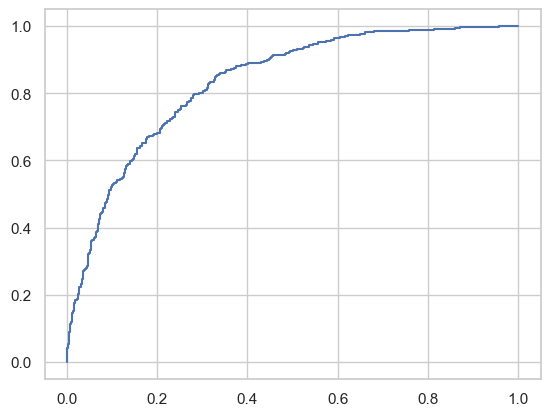

In [19]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
evaluate_model(log_model, X_test, y_test, "Logistic Regression")


📌 Random Forest natijalari:
Accuracy: 0.795
F1 Score: 0.576
ROC-AUC: 0.833
Confusion Matrix:
 [[776  68]
 [175 165]]
--------------------------------------------------


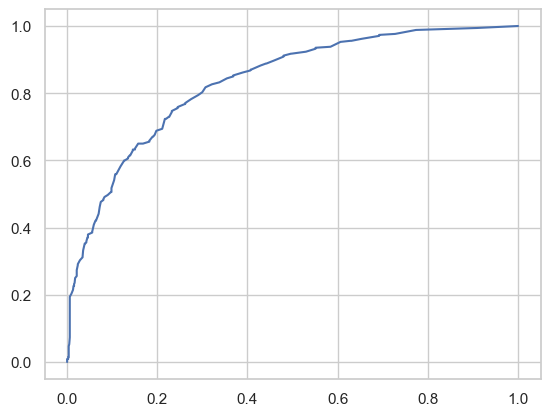

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, "Random Forest")


C:\Users\user\AppData\Local\Temp\ipykernel_14636\3051983383.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


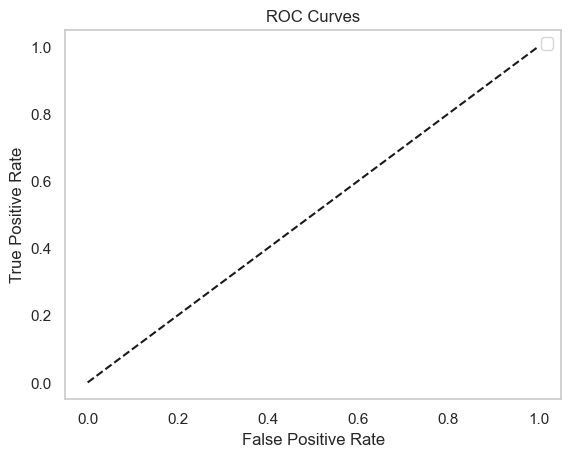

In [21]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()


In [22]:
import joblib

# Agar sizning modelingiz nomi rf_model bo‘lsa
joblib.dump(rf_model, "model.pkl")


['model.pkl']

In [23]:
import streamlit as st
import pickle
import numpy as np

# Modelni yuklash
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

st.title("Mijoz Churn Bashorati")

# Foydalanuvchi ma’lumotlari
gender = st.selectbox("Jinsi", ["Male", "Female"])
tenure = st.slider("Tenure (oylarda)", 0, 72, 12)
monthly = st.number_input("Monthly Charges", min_value=0.0)
contract = st.selectbox("Shartnoma turi", ["Month-to-month", "One year", "Two year"])

# Kodingizga mos formatda ma’lumotlar tayyorlash
input_data = np.array([[tenure, monthly, gender=="Male", contract=="One year", contract=="Two year"]])
if st.button("Bashorat qilish"):
    input_data = np.array([[tenure, monthly, gender=="Male", contract=="One year", contract=="Two year"]])
    proba = model.predict_proba(input_data)[0][1]  # ← Bu qatorda izoh bo‘lmasligi kerak
    label = "Ketadi" if proba >= 0.5 else "Ketmaydi"
    st.success(f"{label} (ehtimollik: {round(proba * 100, 2)}%)")



# Natija
if st.button("Bashorat qilish"):
    st.success(f"{label} (ehtimol: {round(proba * 100, 2)}%)")


2025-06-20 13:51:27.661 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 13:51:27.985 
  command:

    streamlit run C:\Users\user\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-20 13:51:27.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 13:51:27.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 13:51:27.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 13:51:27.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 13:51:27.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 13:51:27.987 Sessi

In [24]:
import joblib

# Modelni tayyorlab bo‘lgach (masalan: rf_model)
joblib.dump(rf_model, "model.pkl")


['model.pkl']

C:\Users\user\AppData\Local\Temp\ipykernel_14636\4283629589.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14636\4283629589.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Logistic Regression:
Accuracy: 0.7672107877927609
F1 Score: 0.4121863799283154
ROC-AUC: 0.8035843675924105
Confusion Matrix:
 [[966  70]
 [258 115]]
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.93      0.85      1036
        True       0.62      0.31      0.41       373

    accuracy                           0.77      1409
   macro avg       0.71      0.62      0.63      1409
weighted avg       0.74      0.77      0.74      1409


Random Forest:
Accuracy: 0.7984386089425124
F1 Score: 0.5448717948717948
ROC-AUC: 0.8516140134772843
Confusion Matrix:
 [[955  81]
 [203 170]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.92      0.87      1036
        True       0.68      0.46      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409



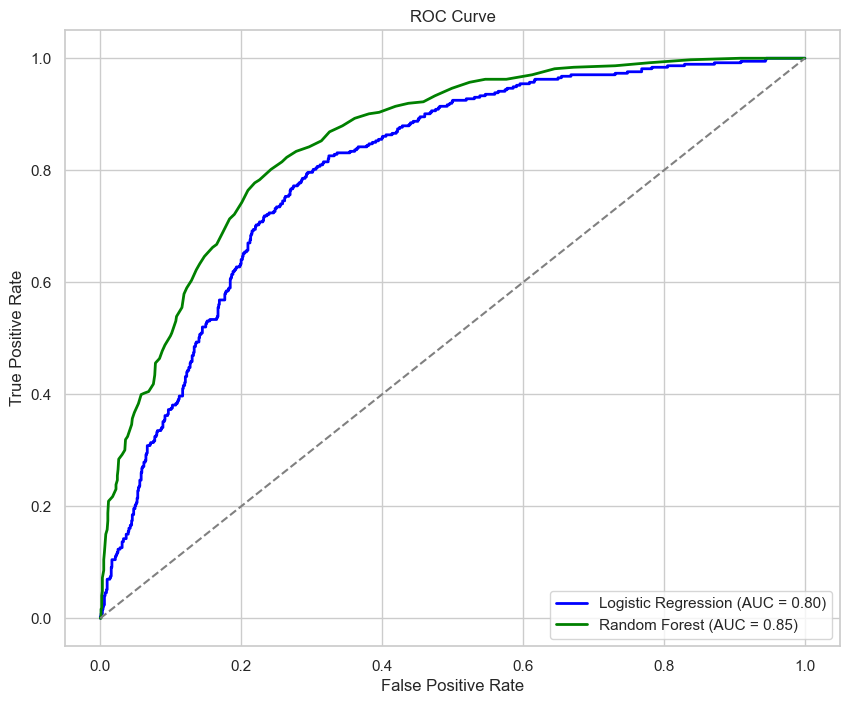

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ma'lumotlarni yuklash
df = pd.read_csv("C:/Users/user/Desktop/modullar/Mustaqil/data.csv")

# 'TotalCharges' ustunini raqamli turga o'tkazish
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 'tenure' ustunini raqamli turga o'tkazish
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# NaN qiymatlarni median bilan to'ldirish
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['tenure'].fillna(df['tenure'].median(), inplace=True)

# Kategorik ustunlarni One-Hot Encoding yordamida kodlash
df_encoded = pd.get_dummies(df, drop_first=True)

# X (xususiyatlar) va y (maqsad) ni ajratish
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Ma'lumotlarni o'rgatish va test to'plamlariga bo'lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sonli ustunlarni masshtablash
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression modelini yaratish va o'rgatish
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Random Forest modelini yaratish va o'rgatish
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Logistic Regression modelini baholash
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Random Forest modelini baholash
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Natijalarni chiqarish
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC Curve ni chizish
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()